In [1]:
from datetime import datetime, timedelta
import itertools
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import time
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter, defaultdict
import seaborn as sns
import re

### 读取数据
- 6319 行
- 31 列

In [2]:
data = pd.read_csv("./Zillow-Fremont_数据交付_20170716.csv")
print data.shape
data.head(2)

(6319, 31)


,URL,state,city,zipcode,area,address,bet,bath,sqft,price,Zestimate,type,built,Parking,Lastremodel,color,roof,yard,HOA,views,shopper,year1,price1,year2,price2,year3,price3,year4,price4,year5,price5
0,https://www.zillow.com/homedetails/34380-Newto...,California,Fremont,94555,Northgate,34380 Newton Court,4,1,1400.00,140000.0,986436.0,Single Family,1970,Garage - Attached,1970.0,NaN,NaN,NaN,NaN,NaN,NaN,06/01/99,292000.00,2/17/05,140000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.zillow.com/homedetails/3909-Steven...,California,Fremont,94538,Downtown,39900 Fremont BoulevardApartment 302,2,2,1042.00,160000.0,535006.0,Condo,1972,No Data,1972.0,NaN,NaN,NaN,NaN,NaN,NaN,11/10/02,225000.00,04/28/17,160000.0,NaN,NaN,NaN,NaN,NaN,NaN


### 特征值缺失情况
- 有12个特征值缺失超过百分之60
- 先保留缺失小于百分之60的特征值
- 6319 行
- 19 列

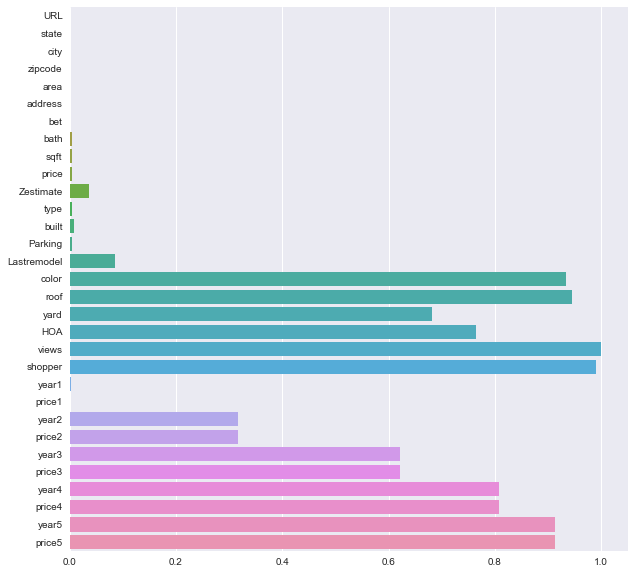

In [3]:
plt.figure(figsize=(10,10))
sns.barplot(y=data.isnull().sum().index, x=data.isnull().sum().values*1.0 / data.shape[0])

In [4]:
data = data.loc[:, data.isnull().sum().values*1.0 / data.shape[0] < 0.6]
print data.shape
data.head(2)

(6319, 19)


,URL,state,city,zipcode,area,address,bet,bath,sqft,price,Zestimate,type,built,Parking,Lastremodel,year1,price1,year2,price2
0,https://www.zillow.com/homedetails/34380-Newto...,California,Fremont,94555,Northgate,34380 Newton Court,4,1,1400.00,140000.0,986436.0,Single Family,1970,Garage - Attached,1970.0,06/01/99,292000.00,2/17/05,140000.0
1,https://www.zillow.com/homedetails/3909-Steven...,California,Fremont,94538,Downtown,39900 Fremont BoulevardApartment 302,2,2,1042.00,160000.0,535006.0,Condo,1972,No Data,1972.0,11/10/02,225000.00,04/28/17,160000.0


### state

In [5]:
Counter(data.state)

Counter({nan: 2, 'California': 6317})

In [6]:
print data.shape
data = data.loc[data.state == "California", :]
print data.shape

(6319, 19)
(6317, 19)


### city

In [7]:
Counter(data.city)

Counter({'Fremont': 6317})

### zipcode

In [8]:
Counter(data.zipcode)

Counter({'94536': 2129,
         '94538': 1615,
         '94539': 1442,
         '94555': 1129,
         '94560': 1,
         '94587': 1})

In [9]:
print data.shape
data = data.loc[[x in ["94536", "94538", "94539", "94555"] for x in data.zipcode], :]
print data.shape

(6317, 19)
(6315, 19)


### area

In [10]:
Counter(data.area)

Counter({'28 Palms': 114,
         '28 Palms apartments': 1,
         'Ardenwood': 511,
         'Ardenwood apartments': 1,
         'Ardenwood houses for rent': 3,
         'Baylands': 1,
         'Blacow': 212,
         'Brookvale': 166,
         'Cabrillo': 325,
         'Cabrillo houses for rent': 1,
         'Cameron Hills': 96,
         'Canyon Heights': 102,
         'Centerville': 466,
         'Centerville apartments': 3,
         'Centerville houses for rent': 1,
         'Cherry-Guardino': 420,
         'Cherry-Guardino apartments': 2,
         'Downtown': 204,
         'East Industrial': 98,
         'Glenmoor': 355,
         'Grimmer': 252,
         'Grimmer houses for rent': 1,
         'Irvington': 288,
         'Irvington apartments': 1,
         'Kimber-Gomes': 193,
         'Lakes and Birds': 140,
         'Lakes and Birds apartments': 1,
         'Mission Hills': 27,
         'Mission San Jose': 204,
         'Mission San Jose houses for rent': 3,
         'Mission V

In [11]:
print data.shape
data = data.loc[['rent' not in x and 'apartment' not in x for x in data.area], :]
print data.shape

(6315, 19)
(6292, 19)


In [12]:
Counter(data.area)

Counter({'28 Palms': 114,
         'Ardenwood': 511,
         'Baylands': 1,
         'Blacow': 212,
         'Brookvale': 166,
         'Cabrillo': 325,
         'Cameron Hills': 96,
         'Canyon Heights': 102,
         'Centerville': 466,
         'Cherry-Guardino': 420,
         'Downtown': 204,
         'East Industrial': 98,
         'Glenmoor': 355,
         'Grimmer': 252,
         'Irvington': 288,
         'Kimber-Gomes': 193,
         'Lakes and Birds': 140,
         'Mission Hills': 27,
         'Mission San Jose': 204,
         'Mission Valley': 219,
         'Niles': 264,
         'Northgate': 471,
         'Parkmont': 153,
         'South Sundale': 190,
         'Sundale': 221,
         'Vineyards-Avalon': 120,
         'Warm Springs': 371,
         'Weibel': 109})

### bet

In [13]:
Counter(data.bet)

Counter({nan: 4,
         '-- ': 182,
         '0.3 acres': 1,
         '0.33 acres': 1,
         '0.34 acres': 1,
         '0.35 acres': 1,
         '0.37 acres': 1,
         '0.41 acres': 2,
         '0.43 acres': 1,
         '0.46 acres': 1,
         '0.53 acres': 1,
         '0.66 acres': 1,
         '0.72 acres': 1,
         '0.75 acres': 1,
         '1': 209,
         '1.1 acres': 1,
         '1.47 acres': 1,
         '10': 1,
         '1622 sqft': 1,
         '2': 1156,
         '2 acres': 1,
         '20.35 acres': 1,
         '26': 1,
         '3': 2554,
         '4': 1720,
         '5': 362,
         '52': 1,
         '56': 1,
         '57': 1,
         '6': 41,
         '7': 4,
         '7199 sqft': 1,
         '7405 sqft': 1,
         '8': 3,
         '86': 1,
         '88': 1,
         '9': 1,
         'Studio': 29})

In [14]:
def cleanBet(s):
    if str(s) == "Studio":
        return 0
    elif 'acres' in str(s) or 'sqft' in str(s):
        return np.nan
    else:
        try:
            r = float(s)
            if r > 10:
                return np.nan
        except:
            r = np.nan
        return r

In [15]:
data.bet = [cleanBet(x) for x in data.bet]

In [16]:
print data.shape
data = data.loc[~np.isnan(data.bet), :]
print data.shape

(6292, 19)
(6080, 19)


### bath

In [17]:
Counter(data.bath)

Counter({'-- ': 34,
         '0.5': 1,
         '1': 898,
         '1.1': 3,
         '1.25': 1,
         '1.5': 190,
         '2': 2763,
         '2.1': 7,
         '2.5': 534,
         '2.75': 2,
         '3': 1262,
         '3.1': 1,
         '3.5': 77,
         '4': 187,
         '4.5': 35,
         '4.75': 1,
         '5': 64,
         '5.5': 2,
         '6': 11,
         '6.5': 3,
         '7': 2,
         '8': 2})

In [18]:
def cleanBath(s):
    try:
        r = float(s)
        if r / 1 == 0.5:
            return r
        else:
            return round(r)
    except:
        return np.nan

In [19]:
data.bath = [cleanBath(x) for x in data.bath]
print data.shape
data = data.loc[~np.isnan(data.bath), :]
print data.shape

(6080, 19)
(6046, 19)


### sqft

In [20]:
def cleanSqft(s):
    try:
        r = float(s)
        return r
    except:
        return np.nan

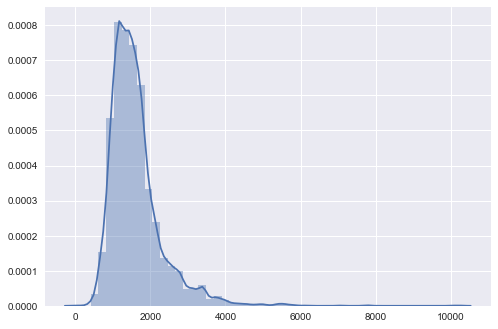

In [21]:
newSqft = np.array([cleanSqft(x) for x in data.sqft])
sns.distplot(newSqft[~np.isnan(newSqft)])

### price

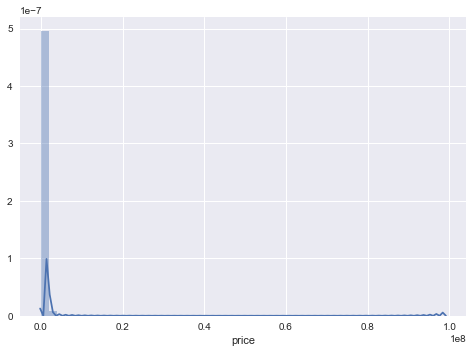

In [22]:
sns.distplot(data.price)

In [23]:
data.loc[data.price > 4000000, :]

,URL,state,city,zipcode,area,address,bet,bath,sqft,price,Zestimate,type,built,Parking,Lastremodel,year1,price1,year2,price2
6174,https://www.zillow.com/homedetails/36542-Boswo...,California,Fremont,94536,Cabrillo,36542 Bosworth Court,4.0,2.0,1764.00,99000000.0,1008717.0,Single Family,1977,2 spaces,1978.0,11/16/05,990000.00,NaN,NaN
6277,https://www.zillow.com/homedetails/44529-Vista...,California,Fremont,94539,Mission Hills,44529 Vista Grande Court,5.0,7.0,10052.00,7350000.0,8794277.0,Single Family,2015,5 spaces,NaN,11/22/06,1700000.00,09/24/10,950000.0
6298,https://www.zillow.com/homedetails/2076-Estate...,California,Fremont,94539,Vineyards-Avalon,2076 Estates Terrace,6.0,5.0,7800.00,4200000.0,3598712.0,Single Family,1997,4 spaces,NaN,01/26/15,4200000.00,01/26/15,4200000.0
6311,https://www.zillow.com/homedetails/2346-Ruther...,California,Fremont,94539,Vineyards-Avalon,2346 Rutherford Lane,5.0,6.0,7746.00,4375000.0,5578310.0,Single Family,1999,5 spaces,1999.0,09/12/96,488000.00,04/18/12,3394500.0


In [24]:
data.loc[data.price > 10000000, "price"] = 990000

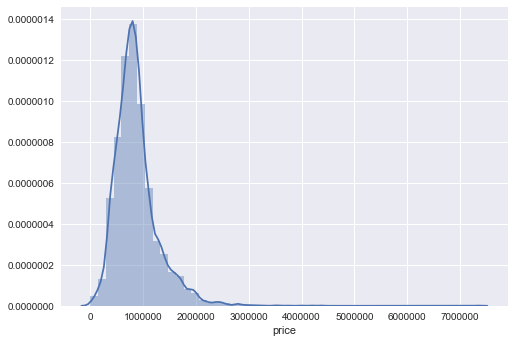

In [25]:
sns.distplot(data.price)

### Zestimate

In [26]:
print data.shape
data = data.loc[~np.isnan(data.Zestimate),:]
print data.shape

(6046, 19)
(5953, 19)


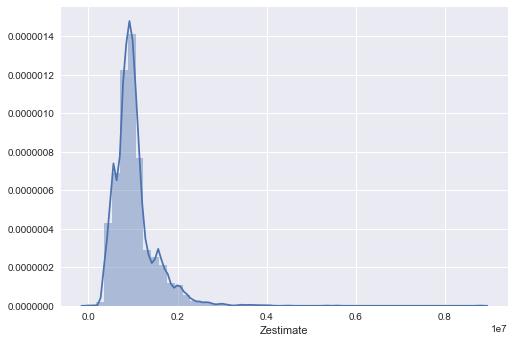

In [27]:
sns.distplot(data.Zestimate)

### type

In [28]:
# type
Counter(data.type)

Counter({'Condo': 1198,
         'Mobile / Manufactured': 8,
         'Multi Family': 33,
         'Multiple Occupancy': 6,
         'Other': 2,
         'Single Family': 4118,
         'Townhouse': 588})

In [29]:
print data.shape
data = data.loc[[x in ["Condo", "Single Family", "Townhouse"] for x in data.type],:]
print data.shape

(5953, 19)
(5904, 19)


### built

In [30]:
print data.shape
data = data.loc[[x != "No Data" for x in data.built], :]
print data.shape

(5904, 19)
(5873, 19)


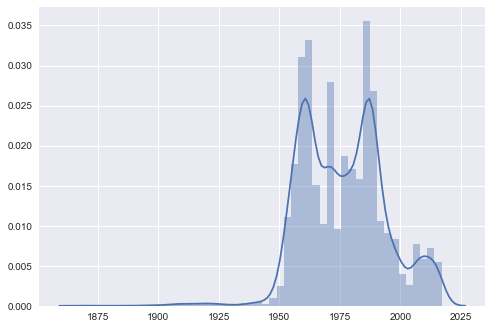

In [31]:
sns.distplot([float(x) for x in data.built])

### parking

In [32]:
# parking
Counter(data.Parking)

Counter({'1 space': 394,
         '102 spaces': 1,
         '2 spaces': 1992,
         '3 spaces': 201,
         '4 spaces': 37,
         '5 spaces': 8,
         '6 spaces': 2,
         '7 spaces': 1,
         'Carport': 169,
         'Carport Garage - Attached': 18,
         'Carport Garage - Attached Garage - Detached Off street': 1,
         'Carport Garage - Attached Garage - Detached Off street On street': 2,
         'Carport Garage - Attached Garage - Detached On street': 1,
         'Carport Garage - Attached Off street': 1,
         'Carport Garage - Attached Off street On street': 3,
         'Carport Garage - Attached On street': 1,
         'Carport Garage - Detached': 4,
         'Carport Garage - Detached Off street On street': 1,
         'Carport Off street': 15,
         'Carport Off street On street': 3,
         'Carport On street': 8,
         'Garage': 1,
         'Garage - Attached': 2165,
         'Garage - Attached Garage - Detached': 11,
         'Garage - Atta

In [33]:
def cleanParking(s):
    if 'Carport' in s:
        return 'Carport'
    elif 'Garage' in s:
        return 'Garage'
    elif 'street' in s:
        return 'street'
    elif 'space' in s:
        r = int(re.sub("[^0-9]", "", s))
        if r > 3:
            return 'moreThan3'
        else:
            return str(r)
    else:
        return np.nan

In [34]:
Counter([cleanParking(x) for x in data.Parking])

Counter({nan: 608,
         '1': 394,
         '2': 1992,
         '3': 201,
         'Carport': 227,
         'Garage': 2372,
         'moreThan3': 49,
         'street': 30})

In [35]:
data.Parking = [cleanParking(x) for x in data.Parking]

In [36]:
print data.shape
data = data.loc[~pd.isnull(data.Parking),:]
print data.shape

(5873, 19)
(5265, 19)


### lastremodel

In [37]:
print data.shape
data = data.loc[~pd.isnull(data.Lastremodel),:]
print data.shape

(5265, 19)
(5090, 19)


In [38]:
data.Lastremodel = 2017 - data.Lastremodel

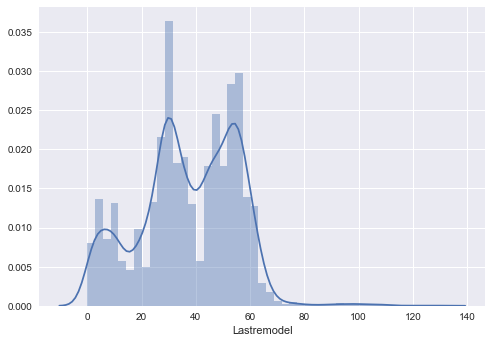

In [39]:
sns.distplot(data.Lastremodel)

### 移除特征值

In [40]:
data.head()

,URL,state,city,zipcode,area,address,bet,bath,sqft,price,Zestimate,type,built,Parking,Lastremodel,year1,price1,year2,price2
0,https://www.zillow.com/homedetails/34380-Newto...,California,Fremont,94555,Northgate,34380 Newton Court,4.0,1.0,1400.00,140000.0,986436.0,Single Family,1970,Garage,47.0,06/01/99,292000.00,2/17/05,140000.0
2,https://www.zillow.com/homedetails/1993-Waycro...,California,Fremont,94539,Mission Valley,1993 Waycross Road,3.0,2.0,1434.00,130000.0,1320951.0,Single Family,1961,Garage,55.0,04/25/17,130000.00,NaN,NaN
3,https://www.zillow.com/homedetails/39327-Sutte...,California,Fremont,94538,Sundale,39327 Sutter Drive,3.0,1.0,948.00,141500.0,668271.0,Single Family,1959,Garage,56.0,06/26/00,329000.00,04/21/17,141500.0
4,https://www.zillow.com/homedetails/5661-Spry-C...,California,Fremont,94538,Blacow,5611 Spry Cmn,2.0,3.0,1157.00,60000.0,710981.0,Condo,1994,1,23.0,02/17/95,173000.00,02/29/00,244500.0
5,https://www.zillow.com/homedetails/46685-Windm...,California,Fremont,94539,Vineyards-Avalon,46685 Windmill Drive,4.0,2.0,3659.00,152000.0,1696201.0,Single Family,1986,3,28.0,04/06/94,550000.00,06/28/13,675000.0


In [41]:
useless = ["URL", "state", "city", "address", "year1", "price1", "year2", "price2"]
print data.shape
data = data.loc[:, [x not in useless for x in data.columns]]
print data.shape

(5090, 19)
(5090, 11)


In [42]:
data.head()

,zipcode,area,bet,bath,sqft,price,Zestimate,type,built,Parking,Lastremodel
0,94555,Northgate,4.0,1.0,1400.00,140000.0,986436.0,Single Family,1970,Garage,47.0
2,94539,Mission Valley,3.0,2.0,1434.00,130000.0,1320951.0,Single Family,1961,Garage,55.0
3,94538,Sundale,3.0,1.0,948.00,141500.0,668271.0,Single Family,1959,Garage,56.0
4,94538,Blacow,2.0,3.0,1157.00,60000.0,710981.0,Condo,1994,1,23.0
5,94539,Vineyards-Avalon,4.0,2.0,3659.00,152000.0,1696201.0,Single Family,1986,3,28.0


### 类别变量

In [43]:
cate_features = ["zipcode", "area", "bet", "bath", "type", "Parking"]
conti_features = ["sqft", "built", "Lastremodel"]
y_features = ["price", "Zestimate"]

In [44]:
cate_df = data.loc[:, [x in cate_features for x in data.columns]]
conti_df = data.loc[:, [x in conti_features for x in data.columns]]
y_df = data.loc[:, [x in y_features for x in data.columns]]
print cate_df.shape
print conti_df.shape
print y_df.shape

(5090, 6)
(5090, 3)
(5090, 2)


In [45]:
for col in cate_df.columns:
    cate_df.loc[:, col] = cate_df.loc[:, col].asobject
cate_df.dtypes

/Users/qiweili/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/qiweili/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


zipcode    object
area       object
bet        object
bath       object
type       object
Parking    object
dtype: object

In [46]:
conti_df = conti_df.apply(pd.to_numeric, errors='raise')
y_df = y_df.apply(pd.to_numeric, errors='raise')
print conti_df.dtypes
print y_df.dtypes

sqft           float64
built            int64
Lastremodel    float64
dtype: object
price        float64
Zestimate    float64
dtype: object


In [47]:
dummy = pd.get_dummies(cate_df)
print dummy.shape

(5090, 59)


In [48]:
X = pd.concat([dummy, conti_df], axis=1)
y = y_df
print X.shape
print y.shape

(5090, 62)
(5090, 2)


In [49]:
X.head()

,zipcode_94536,zipcode_94538,zipcode_94539,zipcode_94555,area_28 Palms,area_Ardenwood,area_Blacow,area_Brookvale,area_Cabrillo,area_Cameron Hills,area_Canyon Heights,area_Centerville,area_Cherry-Guardino,area_Downtown,area_East Industrial,area_Glenmoor,area_Grimmer,area_Irvington,area_Kimber-Gomes,area_Lakes and Birds,area_Mission Hills,area_Mission San Jose,area_Mission Valley,area_Niles,area_Northgate,area_Parkmont,area_South Sundale,area_Sundale,area_Vineyards-Avalon,area_Warm Springs,area_Weibel,bet_0.0,bet_1.0,bet_2.0,bet_3.0,bet_4.0,bet_5.0,bet_6.0,bet_7.0,bet_8.0,bath_0.5,bath_1.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,bath_8.0,type_Condo,type_Single Family,type_Townhouse,Parking_1,Parking_2,Parking_3,Parking_Carport,Parking_Garage,Parking_moreThan3,Parking_street,sqft,built,Lastremodel
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1400.0,1970,47.0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1434.0,1961,55.0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,948.0,1959,56.0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1157.0,1994,23.0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3659.0,1986,28.0


### 模型

In [50]:
# from sklearn import datasets, linear_model
# from sklearn import preprocessing
# X_scaled = preprocessing.scale(X)
# regr = linear_model.LinearRegression()
# regr.fit(X, y.price)
# pd.DataFrame(zip(X.columns, regr.coef_), columns=["feature", "coef"]).sort_values("coef")
# print("Mean squared error: %.2f"
#       % np.mean((regr.predict(X) - y.price) ** 2))

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, y.price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

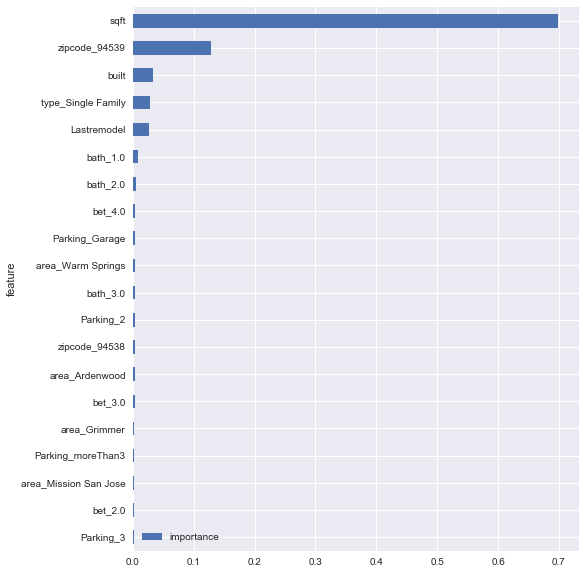

In [52]:
pd.DataFrame(zip(X.columns, rf.feature_importances_), columns=["feature", "importance"]).sort_values("importance", ascending=True).tail(20).plot(x="feature", y="importance", kind="barh", figsize=(8,10))

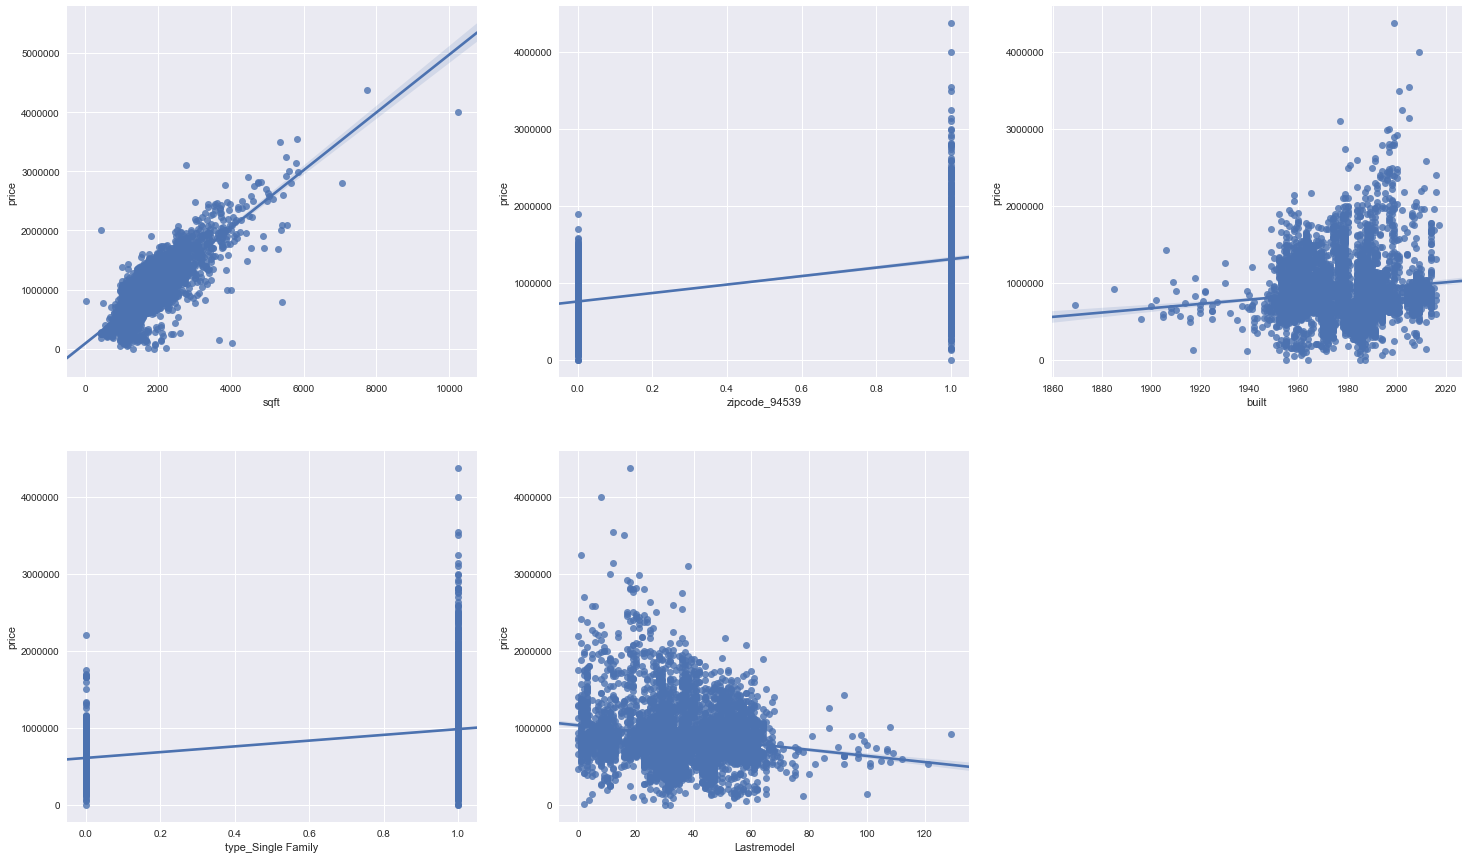

In [53]:
plt.figure(figsize=(25,15))
ax1 = plt.subplot(2,3,1)
sns.regplot(x = X.sqft, y = y.price, ax=ax1)
ax2 = plt.subplot(2,3,2)
sns.regplot(x = X.zipcode_94539, y = y.price, ax=ax2)
ax3 = plt.subplot(2,3,3)
sns.regplot(x = X.built, y = y.price, ax=ax3)
ax4 = plt.subplot(2,3,4)
sns.regplot(x = X["type_Single Family"], y = y.price, ax=ax4)
ax5 = plt.subplot(2,3,5)
sns.regplot(x = X.Lastremodel, y = y.price, ax=ax5)